# Project Overview

### Objective:
1. Determine which Anime title is the top-rated Anime based on 76,000 user inputs.

2. Determine if the Animes that I enjoy and have watched are highly rated.

### Data Source:
The data source comes from [Kaggle's Anime Recommendations Database](https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database).

    

## Data Collection and Loading

#### Load Data:
Initially attempted to load the data via API using kagglehub but it resulted in a user warning that led me to loading datasets as .csv



In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [70]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [71]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("CooperUnion/anime-recommendations-database")

print("Path to dataset files:", path)

Path to dataset files: /Users/luckyc/.cache/kagglehub/datasets/CooperUnion/anime-recommendations-database/versions/1


### Get Datasets:
- Did .csv method using relative paths
- Labeled one data set that had mostly data as anime_data (this dataset also has rating column)
- Labeled the other data set as anime_rating
- Reviewed shape of data



In [72]:
#get the anime dataset

anime_data = pd.read_csv("anime.csv")

In [73]:
#get rating dataset
anime_rating = pd.read_csv("rating.csv")

In [74]:
#number of rows and columns in anime dataset
data_shape = anime_data.shape
print(f" The DataFrame has {data_shape[0]} rows and {data_shape[1]} columns! \n")
print(anime_data.info())

 The DataFrame has 12294 rows and 7 columns! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [75]:
#number of rows and colums in rating dataset
rating_shape = anime_rating.shape
print(f" The DataFrame has {rating_shape[0]} rows and {rating_shape[1]} columns! \n")
print(anime_rating.info())

 The DataFrame has 7813737 rows and 3 columns! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


### Initial Check:
#### anime_data
- Checked the first 5 and last 5 rows
- Checked the minimum and maximum values of the rating column

#### anime_rating
- Checked the first 5 and last 5 rows
- Checked the minimum and maximum values of the rating column


In [76]:
#top 5 rows 
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.260,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.250,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.170,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.160,151266


In [77]:
#last 5 rows
anime_data.tail()

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.150,211
12290,5543,Under World,Hentai,OVA,1,4.280,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.880,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.980,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.460,142


In [78]:
# checking min of rating column in anime data dataset
anime_data_min = anime_data["rating"].min()
print(f"The minimum in the anime data dataset for the Rating column is {anime_data_min}")


The minimum in the anime data dataset for the Rating column is 1.67


In [79]:
# checking min of rating column in anime data dataset
anime_data_max = anime_data["rating"].max()
print(f"The maximum in the anime data dataset for the Rating column is {anime_data_max}")


The maximum in the anime data dataset for the Rating column is 10.0


In [80]:
#top 5 rows of rating
anime_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [81]:
#last 5 rows of rating
anime_rating.tail()

,user_id,anime_id,rating
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9
7813736,73516,8074,9


In [82]:
# checking min of rating column in anime rating dataset
anime_rating_min = anime_rating["rating"].min()
print(f"The minimum in the anime rating dataset for the Rating column is {anime_rating_min}")


The minimum in the anime rating dataset for the Rating column is -1


In [83]:
#checking max of rating column in anime rating dataset
anime_rating_max = anime_rating["rating"].max()
print(f"The maximum in the anime rating dataset for the Rating column is {anime_rating_max}")

The maximum in the anime rating dataset for the Rating column is 10


### Checking Data:

#### anime_data
- Checked for null values
- Checked column headings
- Updated float to show 3 places after decimal

#### anime_rating
- Checked for null values
- Checked column headings
- Updated float to show 3 places after decimal

In [84]:
# checking if any values are null in data of anime data
print(anime_data.isnull().any().any())

True


In [85]:
# Getting a count of null values in each column
anime_data.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [86]:
#Displays only rows that contain null values

anime_data[anime_data.isna().any(axis=1)]

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.150,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.960,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.270,313
6646,32695,Match Shoujo,NaN,ONA,1,6.020,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.790,607
...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1,NaN,79
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [87]:
#Column names for anime data
anime_data.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [88]:
#using describe for anime data
pd.options.display.float_format = "{:,.3f}".format
anime_data.describe()

,anime_id,rating,members
count,"12,294.000","12,064.000","12,294.000"
mean,"14,058.222",6.474,"18,071.339"
std,"11,455.295",1.027,"54,820.677"
min,1.000,1.670,5.000
25%,"3,484.250",5.880,225.000
50%,"10,260.500",6.570,"1,550.000"
75%,"24,794.500",7.180,"9,437.000"
max,"34,527.000",10.000,"1,013,917.000"


In [89]:
# checking if any values are null in data of anime rating
print(anime_rating.isnull().any().any())

False


In [90]:
anime_rating.isnull().any(axis=0)

user_id     False
anime_id    False
rating      False
dtype: bool

In [91]:
#column names for anime rating
anime_rating.columns

Index(['user_id', 'anime_id', 'rating'], dtype='object')

In [92]:
#using describe for anime rating
pd.options.display.float_format = "{:,.3f}".format
anime_rating.describe()

,user_id,anime_id,rating
count,"7,813,737.000","7,813,737.000","7,813,737.000"
mean,"36,727.957","8,909.072",6.144
std,"20,997.946","8,883.950",3.728
min,1.000,1.000,-1.000
25%,"18,974.000","1,240.000",6.000
50%,"36,791.000","6,213.000",7.000
75%,"54,757.000","14,093.000",9.000
max,"73,516.000","34,519.000",10.000


### Checking/Manipulating Data:

#### anime_data
- Changed column headings to title format
- Chose columns to drop
- Dropped Nan/Null values
- Viewed updated clean data

#### anime_rating
- Changed column headings to title format


In [93]:
#convert data columns to title case
anime_data.columns = anime_data.columns.str.title()
anime_data.head(2)

,Anime_Id,Name,Genre,Type,Episodes,Rating,Members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.260,793665


In [94]:
#convert rating columns to title case
anime_rating.columns = anime_rating.columns.str.title()
anime_rating.head(2)

,User_Id,Anime_Id,Rating
0,1,20,-1
1,1,24,-1


In [95]:
columns_to_drop = ["Episodes", "Members"]

In [96]:
#actually dropping columns and checking first 2 rows

anime_data_drop = anime_data.drop(columns = columns_to_drop)

anime_data_drop.head(2)

,Anime_Id,Name,Genre,Type,Rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.370
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.260


In [97]:
# Removing only the NaN / Null values as they appeared in dataset
anime_data_clean = anime_data_drop.dropna(how= "any")
anime_data_clean

,Anime_Id,Name,Genre,Type,Rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.370
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.260
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.250
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,9.170
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.160
...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,4.150
12290,5543,Under World,Hentai,OVA,4.280
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.880
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,4.980


In [98]:
#displays any nulls that may have not been cleaned. if clean is proper it should be blank

anime_data_clean[anime_data_clean.isna().any(axis=1)]

,Anime_Id,Name,Genre,Type,Rating


In [99]:
anime_data_clean.head()

,Anime_Id,Name,Genre,Type,Rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.370
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.260
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.250
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,9.170
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.160


In [100]:
anime_data_clean.tail()

,Anime_Id,Name,Genre,Type,Rating
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,4.150
12290,5543,Under World,Hentai,OVA,4.280
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.880
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,4.980
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,5.460


In [101]:
#QUICK math facts of numerical items
anime_data_clean.describe()

,Anime_Id,Rating
count,"12,017.000","12,017.000"
mean,"13,638.001",6.478
std,"11,231.077",1.024
min,1.000,1.670
25%,"3,391.000",5.890
50%,"9,959.000",6.570
75%,"23,729.000",7.180
max,"34,519.000",10.000


In [102]:
#Checking shape of cleaned dataset
anime_data_clean.shape

(12017, 5)

In [103]:
anime_data_clean.head()

,Anime_Id,Name,Genre,Type,Rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.370
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.260
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.250
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,9.170
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.160


#### Search Option:
*Created a search function to find a specific anime within the anime_data_clean dataset*

In [104]:
def filter_by_name(anime_data_clean, search_term):
    # use str.contains() for partial match
    return anime_data_clean[anime_data_clean["Name"].str.contains(search_term, case=False)]

In [105]:
filter_by_name(anime_data_clean, "Stargazer")


,Anime_Id,Name,Genre,Type,Rating
2556,1215,Mobile Suit Gundam Seed C.E.73: Stargazer,"Mecha, Military, Sci-Fi, Space",ONA,7.230


## Data Cleaning and Preparation:
Merged the anime_data_clean and anime_rating datasets
- Checked the shape
- Checked the first 5 and last 5 rows
- Noticed the duplicates:
    - Dropped duplicates and chose to keep the first iteration
- Created a new column by calculating the mean of Rating_x and Rating_y 
    - Dropped Rating_x and Rating_y columns


In [106]:
#Attempt to merge dataframes anime_data_clean and anime_rating 
merged_anime = pd.merge(anime_data_clean, anime_rating, on='Anime_Id', how='inner')


In [107]:
merged_anime.shape

(7813611, 7)

In [108]:
#Checking top view
merged_anime.head()

,Anime_Id,Name,Genre,Type,Rating_x,User_Id,Rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.370,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.370,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.370,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.370,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.370,278,-1


In [109]:
#Checking bottom view

merged_anime.tail()

,Anime_Id,Name,Genre,Type,Rating_x,User_Id,Rating_y
7813606,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,4.980,39532,-1
7813607,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,4.980,48766,-1
7813608,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,4.980,60365,4
7813609,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,5.460,27364,-1
7813610,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,5.460,48766,-1


In [110]:
#Mean of rating_x and rating_y to creating Rating_mean

merged_anime['Rating_Mean']= merged_anime[['Rating_x', 'Rating_y']].mean(axis=1)

In [111]:
cols_to_drop = ["Rating_x", "Rating_y"]

merged_anime_2 = merged_anime.drop(columns = cols_to_drop)



In [112]:
merged_anime_2.head()

,Anime_Id,Name,Genre,Type,User_Id,Rating_Mean
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,99,7.185
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,152,9.685
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,244,9.685
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,271,9.685
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,278,4.185


In [113]:
#Removing Duplicates
merged_anime_clean = merged_anime_2.drop_duplicates(subset="Anime_Id", keep='first')

In [114]:
#Checking that duplicates were dropped
merged_anime_clean.head(5)

,Anime_Id,Name,Genre,Type,User_Id,Rating_Mean
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,99,7.185
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,3,9.630
26773,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,39,4.125
28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV,5,9.085
47442,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,5,9.080


In [115]:
# Filter the DataFrame for successful projects
filtered_data = merged_anime_clean[merged_anime_clean['Rating_Mean'] >= 7.5]

# Group by Category and State and sum the specified columns
top_anime = filtered_data.groupby(['Anime_Id', 'Name', 'Type'])[[ 'Rating_Mean']].mean().reset_index()

# Sort the entire DataFrame by 'Usd Pledged Real' in descending order
top_anime = top_anime.sort_values(by='Rating_Mean', ascending=False)

top_anime.shape

(1713, 4)

In [142]:
top_anime.head(25)

,Anime_Id,Name,Type,Rating_Mean
813,5114,Fullmetal Alchemist: Brotherhood,TV,9.630
215,820,Ginga Eiyuu Densetsu,OVA,9.555
1316,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Movie,9.550
56,199,Sen to Chihiro no Kamikakushi,Movie,9.465
136,457,Mushishi,TV,9.390
67,245,Great Teacher Onizuka,TV,9.385
1213,11665,Natsume Yuujinchou Shi,TV,9.375
1577,28957,Mushishi Zoku Shou: Suzu no Shizuku,Movie,9.375
1214,11741,Fate/Zero 2nd Season,TV,9.365
363,1535,Death Note,TV,9.355


In [116]:
def sorted_columns(top_anime, search_value):
    #Filter based on search_value in "Type" column
    filtered_top_anime = top_anime[top_anime["Type"].str.contains(search_value, case=False)]
    
    # Sort the filtered dataframe by "Rating_y" highest to lowest
    sorted_top_anime = filtered_top_anime.sort_values(by="Rating_Mean", ascending=False)
    
    return sorted_top_anime



In [141]:
top_anime_tv = sorted_columns(top_anime, "TV").head(2)
top_anime_tv

,Anime_Id,Name,Type,Rating_Mean
813,5114,Fullmetal Alchemist: Brotherhood,TV,9.630
136,457,Mushishi,TV,9.390


In [118]:
top_anime_movie= sorted_columns(top_anime, "Movie").head(2)
top_anime_movie

,Anime_Id,Name,Type,Rating_Mean
1316,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Movie,9.550
56,199,Sen to Chihiro no Kamikakushi,Movie,9.465


In [119]:
top_anime_ova= sorted_columns(top_anime, "OVA").head(2)
top_anime_ova

,Anime_Id,Name,Type,Rating_Mean
215,820,Ginga Eiyuu Densetsu,OVA,9.555
900,6336,Mobile Suit Gundam Unicorn,OVA,9.200


In [120]:
top_anime_special= sorted_columns(top_anime, "Special").head(2)
top_anime_special

,Anime_Id,Name,Type,Rating_Mean
1431,20159,Pokemon: The Origin,Special,8.970
935,6862,K-On!: Live House!,Special,8.940


In [121]:
top_anime_music= sorted_columns(top_anime, "Music").head(2)
top_anime_music

,Anime_Id,Name,Type,Rating_Mean
197,731,Interstella5555: The 5tory of The 5ecret 5tar ...,Music,9.085
1307,14951,Wonderful Rush,Music,8.700


In [122]:
top_anime_ona= sorted_columns(top_anime, "ONA").head(2)
top_anime_ona

,Anime_Id,Name,Type,Rating_Mean
1680,32668,Noblesse: Awakening,ONA,8.860
1289,14123,Pokemon Black and White 2: Introduction Movie,ONA,8.855


In [137]:

top_10_anime_overall= top_anime.sort_values(by='Rating_Mean', ascending=False).head(10)

top_10_anime_overall

,Anime_Id,Name,Type,Rating_Mean
813,5114,Fullmetal Alchemist: Brotherhood,TV,9.630
215,820,Ginga Eiyuu Densetsu,OVA,9.555
1316,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Movie,9.550
56,199,Sen to Chihiro no Kamikakushi,Movie,9.465
136,457,Mushishi,TV,9.390
67,245,Great Teacher Onizuka,TV,9.385
1213,11665,Natsume Yuujinchou Shi,TV,9.375
1577,28957,Mushishi Zoku Shou: Suzu no Shizuku,Movie,9.375
1214,11741,Fate/Zero 2nd Season,TV,9.365
363,1535,Death Note,TV,9.355


In [124]:
highest_rated = top_anime.sort_values(by='Rating_Mean', ascending=False).head(1)
print(highest_rated)

     Anime_Id                              Name Type  Rating_Mean
813      5114  Fullmetal Alchemist: Brotherhood   TV        9.630


## Exploratory Data Anaylsis

1. Used a function to calculcate total, mean and median of rating in the top anime dataset (merged datasets)
2. Used earlier code to create a filter to plot overall top anime across all types
3. Used filter in a function to create plots for top anime for specific types

In [125]:
#Checking values

def summarize_top_anime(top_anime) -> str:
    """
    Calculates and summarizes the total, mean, and median number of Rating in 
    Top Anime dataset.

    Parameters:
        top_anime (pandas.DataFrame): The anime dataset containing a 
                                         'Rating_Mean' column.

    Returns:
        str: A formatted string summarizing the total, mean (rounded to 2 decimal places),
            and median number of ratings.
    """
    # Calculate total, mean, and median backers
    top_anime_sum= top_anime["Rating_Mean"].sum().round(2)
    top_anime_mean = top_anime["Rating_Mean"].mean().round(2)
    top_anime_median = top_anime["Rating_Mean"].median().round(2)

    # Return a formatted string
    return (f"The sum of Rating_Mean is {top_anime_sum}\n"
           f"The mean number of Rating_Mean is {top_anime_mean}\n"
           f"The median number of Rating_Mean is {top_anime_median}")

In [126]:
#This is the summary of top_anime dataset ratings (sum, mean, median)
summary_top_anime = summarize_top_anime(top_anime)
print(summary_top_anime)

The sum of Rating_Mean is 13885.34
The mean number of Rating_Mean is 8.11
The median number of Rating_Mean is 8.04


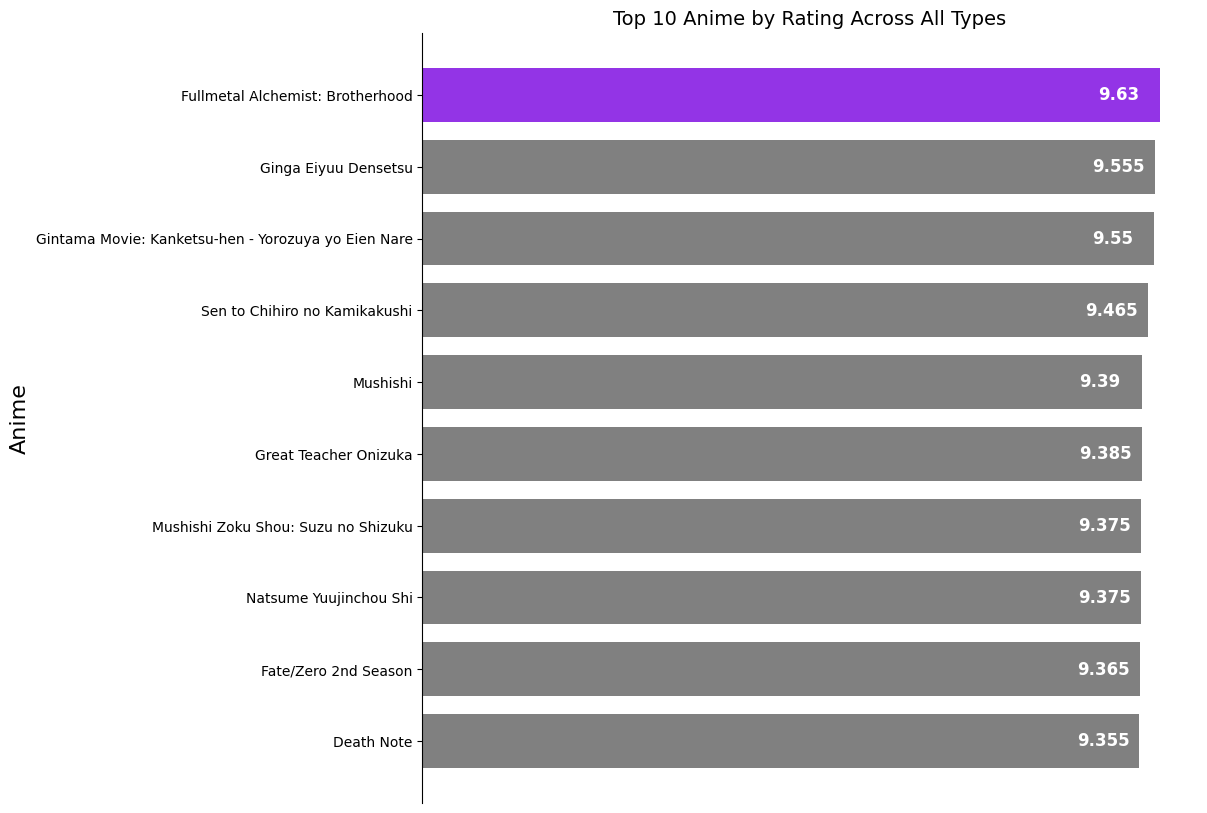

In [138]:
# Start of plotting - this is for overall top anime across all types
#Sort values for purpose of Horizontal bar graph to display Top Anime and following
top_10_anime_overall_sorted = top_10_anime_overall.sort_values(by="Rating_Mean", ascending=True)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

#Attempt to highlight top rated anime
max_rating_value = top_10_anime_overall_sorted['Rating_Mean'].max()
max_rating_name = top_10_anime_overall_sorted[top_10_anime_overall_sorted['Rating_Mean'] == max_rating_value]['Name'].iloc[0]

#colors
highlight_color = "#9334e6"
non_highlight = "#808080"


top_10_anime_overall_sorted['colors'] = top_10_anime_overall_sorted['Name'].apply(lambda x: highlight_color if x == max_rating_name else non_highlight)



# Create the horizontal bar chart with sorted data
bars = plt.barh(top_10_anime_overall_sorted['Name'], top_10_anime_overall_sorted['Rating_Mean'], color=top_10_anime_overall_sorted['colors'], height = .75)

#remove top, bottom and right spines
ax.spines[["top", "right", "bottom"]].set_visible(False)
ax.xaxis.set_visible(False)

#Add Bar Labels
ax.bar_label(bars, padding=-45, color="white", fontsize=12, label_type="edge", fontweight="bold")


# Add title and labels
plt.title('Top 10 Anime by Rating Across All Types', fontsize= 14)
plt.xlabel('Rating Mean')
plt.ylabel('Anime', fontsize=16)

# Show the plot
plt.show()

### TOP ANIME OVERALL and Type TV: Fullmetal Alchemist: Brotherhood
<img src="Fullmetal-Alchemist-Brotherhood-1.jpg" width="400">

In [128]:


def plot_top_anime(top_anime, search_value):
    # Filter the DataFrame based on the search value
    filtered_top_anime = top_anime[top_anime["Type"].str.contains(search_value, case=False)]
    
    # Sort the filtered DataFrame by "Rating_Mean" from highest to lowest
    sorted_top_anime = filtered_top_anime.sort_values(by="Rating_Mean", ascending=False)
    
    # Sort values for purpose of Horizontal bar graph to display Top Anime and following
    top_10_anime_sorted = sorted_top_anime.head(10).sort_values(by="Rating_Mean", ascending=True)

    # Create the figure and axis for plotting
    fig, ax = plt.subplots(figsize=(8, 8))

    # Attempt to highlight the top-rated anime
    max_rating_value = top_10_anime_sorted['Rating_Mean'].max()
    max_rating_name = top_10_anime_sorted[top_10_anime_sorted['Rating_Mean'] == max_rating_value]['Name'].iloc[0]

    # Define colors for highlighting
    highlight_color = "#9334e6"
    non_highlight = "#808080"

    # Assign colors based on whether the anime has the maximum rating
    top_10_anime_sorted['colors'] = top_10_anime_sorted['Name'].apply(lambda x: highlight_color if x == max_rating_name else non_highlight)

    # Create the horizontal bar chart with sorted data
    bars = plt.barh(top_10_anime_sorted['Name'], top_10_anime_sorted['Rating_Mean'], color=top_10_anime_sorted['colors'], height=0.75)

    # Remove top, bottom, and right spines
    ax.spines[["top", "right", "bottom"]].set_visible(False)
    ax.xaxis.set_visible(False)

    # Add bar labels
    ax.bar_label(bars, padding=-45, color="white", fontsize=12, label_type="edge", fontweight="bold")

    # Add title and labels
    plt.title(f"Top 10 Anime by Type: {search_value}, by Rating_Mean", fontsize=14)
    plt.xlabel('Rating Mean')
    plt.ylabel('Anime', fontsize=16)

    # Show the plot
    plt.show()

    # Return the sorted DataFrame (optional, based on your needs)
    return top_10_anime_sorted



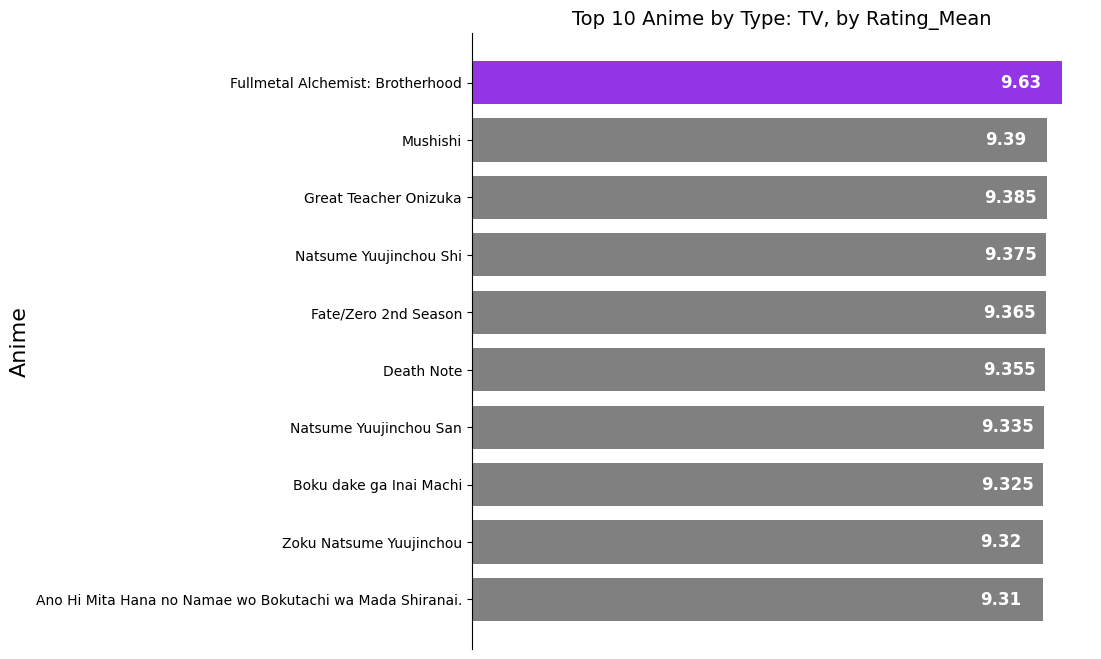

,Anime_Id,Name,Type,Rating_Mean,colors
1118,9989,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...,TV,9.310,#808080
840,5300,Zoku Natsume Yuujinchou,TV,9.320,#808080
1614,31043,Boku dake ga Inai Machi,TV,9.325,#808080
1146,10379,Natsume Yuujinchou San,TV,9.335,#808080
363,1535,Death Note,TV,9.355,#808080
1214,11741,Fate/Zero 2nd Season,TV,9.365,#808080
1213,11665,Natsume Yuujinchou Shi,TV,9.375,#808080
67,245,Great Teacher Onizuka,TV,9.385,#808080
136,457,Mushishi,TV,9.390,#808080
813,5114,Fullmetal Alchemist: Brotherhood,TV,9.630,#9334e6


In [139]:
plot_top_anime(top_anime, "TV")

## Top Anime Movie Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare
![Gintama](topmovie.jpg)

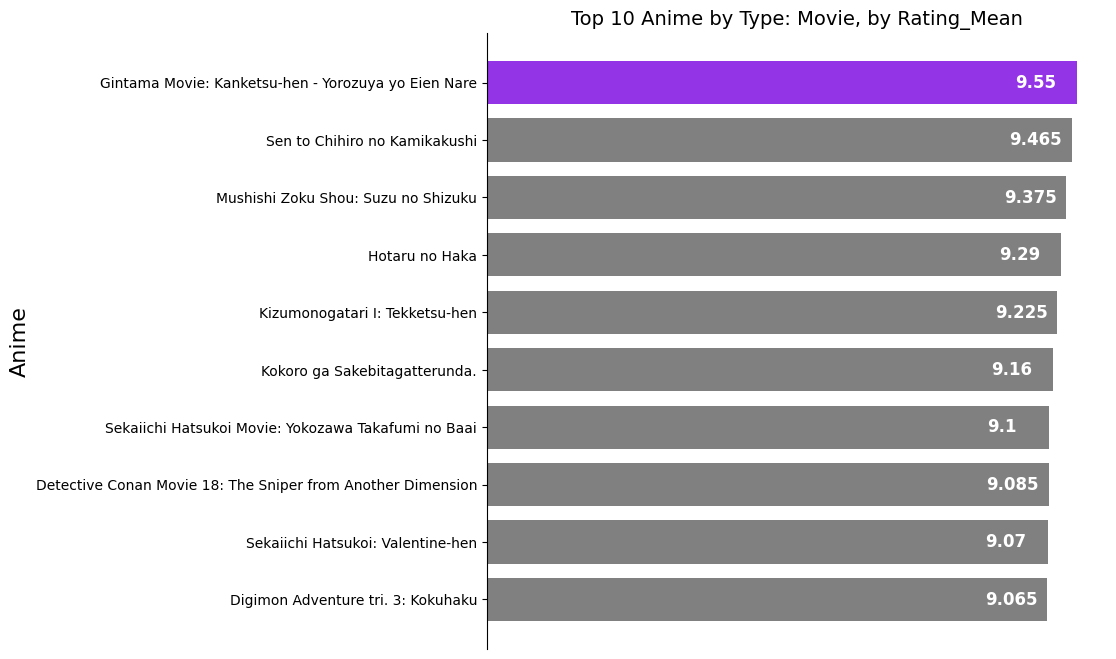

,Anime_Id,Name,Type,Rating_Mean,colors
1676,32551,Digimon Adventure tri. 3: Kokuhaku,Movie,9.065,#808080
1442,20815,Sekaiichi Hatsukoi: Valentine-hen,Movie,9.070,#808080
1455,21419,Detective Conan Movie 18: The Sniper from Anot...,Movie,9.085,#808080
1433,20371,Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no...,Movie,9.100,#808080
1570,28725,Kokoro ga Sakebitagatterunda.,Movie,9.160,#808080
1075,9260,Kizumonogatari I: Tekketsu-hen,Movie,9.225,#808080
167,578,Hotaru no Haka,Movie,9.290,#808080
1577,28957,Mushishi Zoku Shou: Suzu no Shizuku,Movie,9.375,#808080
56,199,Sen to Chihiro no Kamikakushi,Movie,9.465,#808080
1316,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Movie,9.550,#9334e6


In [130]:
plot_top_anime(top_anime, "Movie")

## Top Anime Special Pokemon: The Origin

<img src="pokemon.jpeg" width="400">

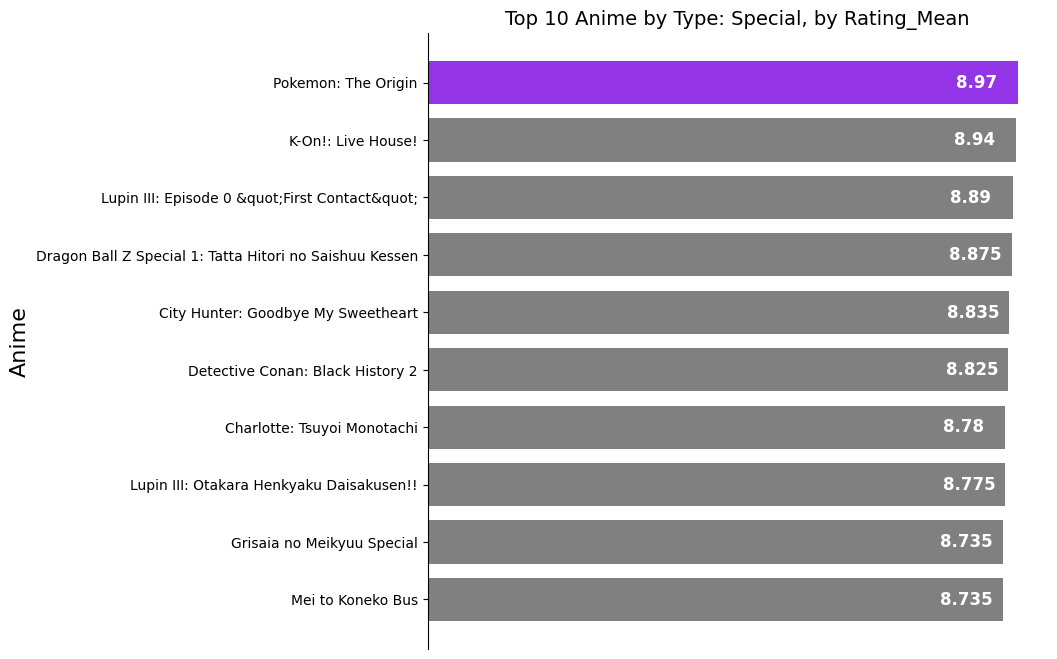

,Anime_Id,Name,Type,Rating_Mean,colors
522,2488,Mei to Koneko Bus,Special,8.735,#808080
1628,31324,Grisaia no Meikyuu Special,Special,8.735,#808080
341,1424,Lupin III: Otakara Henkyaku Daisakusen!!,Special,8.775,#808080
1640,31553,Charlotte: Tsuyoi Monotachi,Special,8.780,#808080
1106,9839,Detective Conan: Black History 2,Special,8.825,#808080
350,1478,City Hunter: Goodbye My Sweetheart,Special,8.835,#808080
255,986,Dragon Ball Z Special 1: Tatta Hitori no Saish...,Special,8.875,#808080
339,1418,Lupin III: Episode 0 &quot;First Contact&quot;,Special,8.890,#808080
935,6862,K-On!: Live House!,Special,8.940,#808080
1431,20159,Pokemon: The Origin,Special,8.970,#9334e6


In [131]:
plot_top_anime(top_anime, "Special")

## Top Anime ONA: Noblesse: Awakening
<img src="noblesse.jpg" width="400">

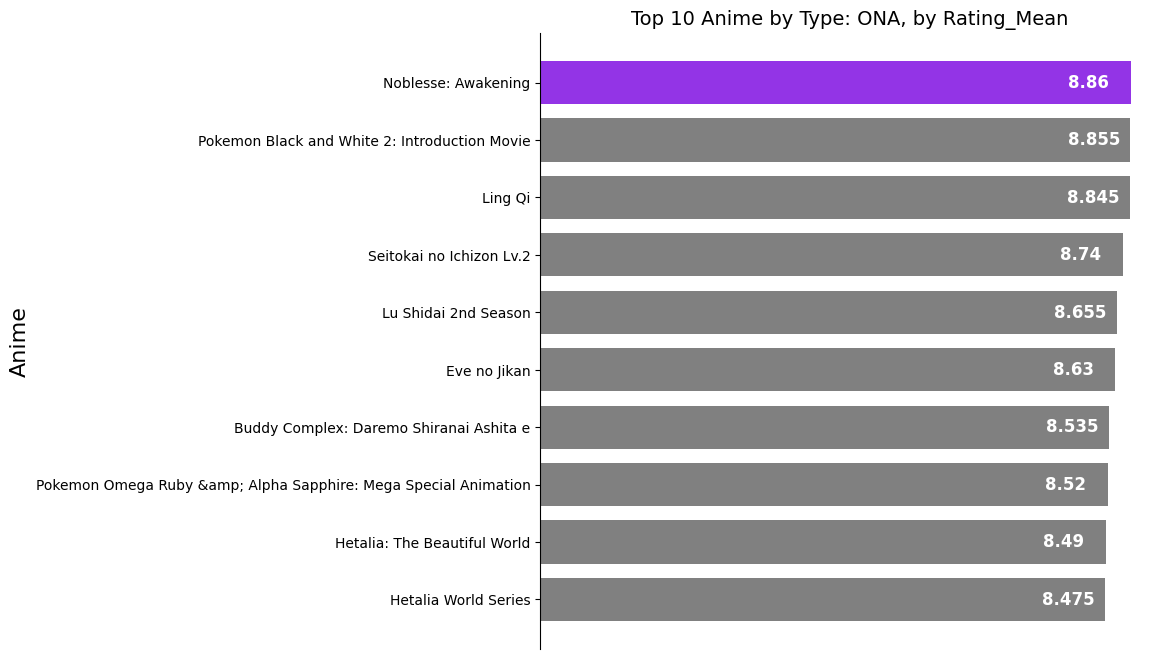

,Anime_Id,Name,Type,Rating_Mean,colors
1035,8479,Hetalia World Series,ONA,8.475,#808080
1313,15195,Hetalia: The Beautiful World,ONA,8.490,#808080
1559,28431,Pokemon Omega Ruby &amp; Alpha Sapphire: Mega ...,ONA,8.520,#808080
1617,31105,Buddy Complex: Daremo Shiranai Ashita e,ONA,8.535,#808080
628,3167,Eve no Jikan,ONA,8.630,#808080
1675,32543,Lu Shidai 2nd Season,ONA,8.655,#808080
1151,10464,Seitokai no Ichizon Lv.2,ONA,8.740,#808080
1702,33605,Ling Qi,ONA,8.845,#808080
1289,14123,Pokemon Black and White 2: Introduction Movie,ONA,8.855,#808080
1680,32668,Noblesse: Awakening,ONA,8.860,#9334e6


In [132]:
plot_top_anime(top_anime, "ONA")

## Top Anime OVA: Ginga Eiyuu Densetsu
![Ginga](ginga.jpg)

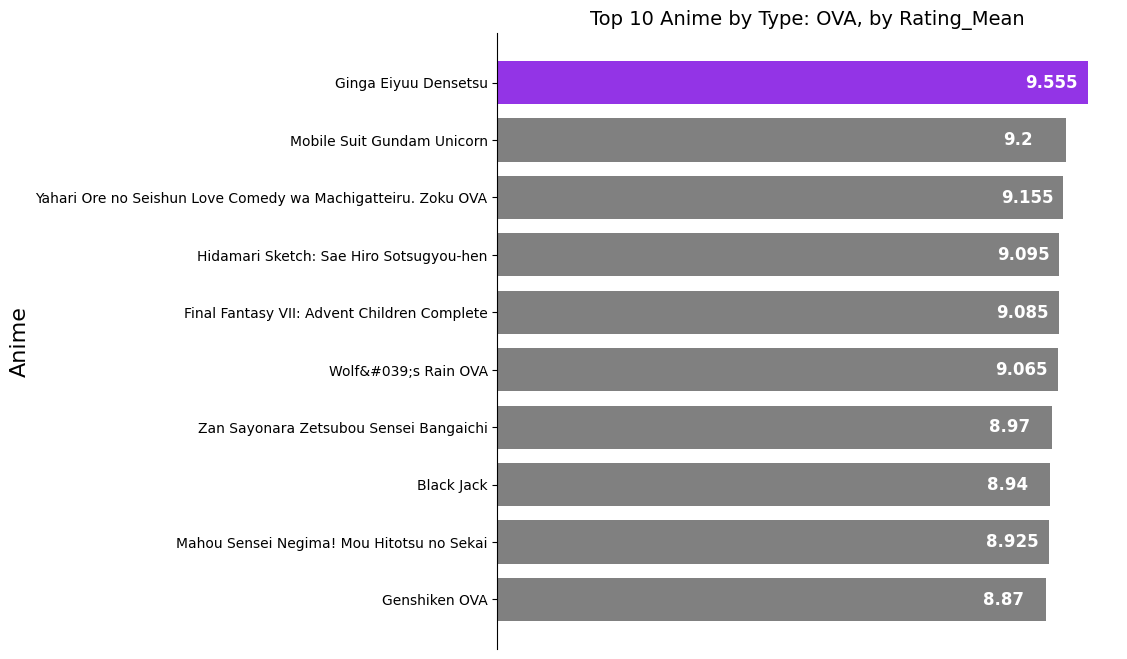

,Anime_Id,Name,Type,Rating_Mean,colors
404,1813,Genshiken OVA,OVA,8.870,#808080
884,6050,Mahou Sensei Negima! Mou Hitotsu no Sekai,OVA,8.925,#808080
359,1520,Black Jack,OVA,8.940,#808080
952,7044,Zan Sayonara Zetsubou Sensei Bangaichi,OVA,8.970,#808080
264,1023,Wolf&#039;s Rain OVA,OVA,9.065,#808080
606,2952,Final Fantasy VII: Advent Children Complete,OVA,9.085,#808080
1381,17739,Hidamari Sketch: Sae Hiro Sotsugyou-hen,OVA,9.095,#808080
1692,33161,Yahari Ore no Seishun Love Comedy wa Machigatt...,OVA,9.155,#808080
900,6336,Mobile Suit Gundam Unicorn,OVA,9.200,#808080
215,820,Ginga Eiyuu Densetsu,OVA,9.555,#9334e6


In [133]:
plot_top_anime(top_anime, "OVA")

## Top Anime Music: Interstella5555: The 5tory of the 5ecret 5tar 5ystem

 
<img src="inter.jpg" width="400">

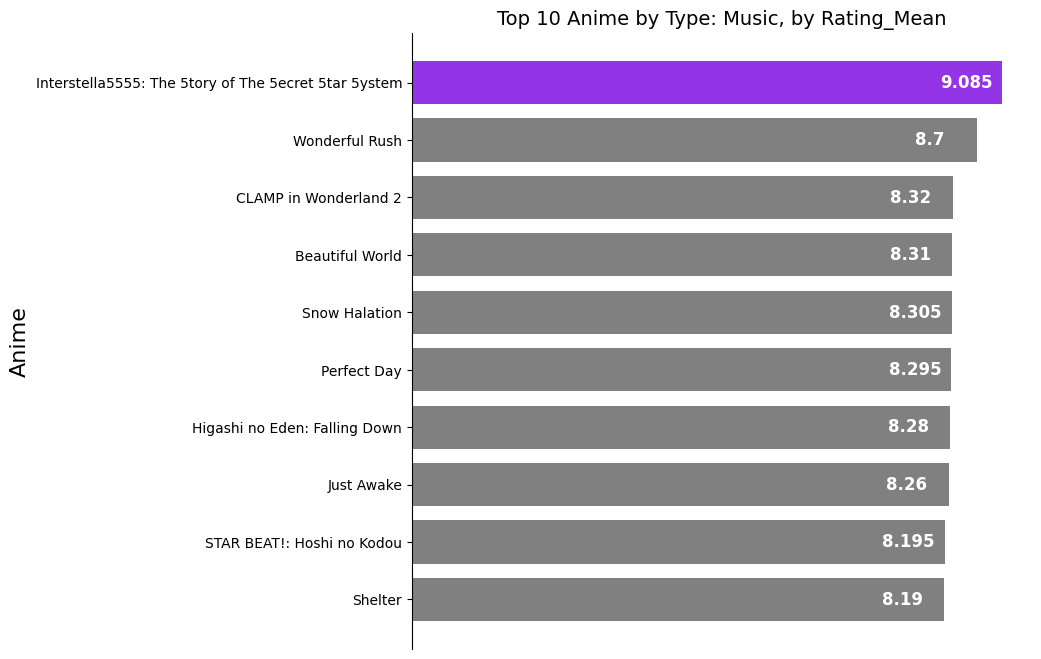

,Anime_Id,Name,Type,Rating_Mean,colors
1710,34240,Shelter,Music,8.190,#808080
1711,34252,STAR BEAT!: Hoshi no Kodou,Music,8.195,#808080
1467,22049,Just Awake,Music,8.260,#808080
904,6399,Higashi no Eden: Falling Down,Music,8.280,#808080
1149,10445,Perfect Day,Music,8.295,#808080
1110,9930,Snow Halation,Music,8.305,#808080
1670,32311,Beautiful World,Music,8.310,#808080
579,2768,CLAMP in Wonderland 2,Music,8.320,#808080
1307,14951,Wonderful Rush,Music,8.700,#808080
197,731,Interstella5555: The 5tory of The 5ecret 5tar ...,Music,9.085,#9334e6


In [134]:
plot_top_anime(top_anime, "Music")


5. Analysis and Insights
Findings: Summarize any patterns observed and address the main project question.
Supporting Data: Reference specific statistics or plot features to back up findings.
6. Conclusion and Recommendations (10 points)
Summarize: Present the main conclusions drawn from the analysis.
Recommendations: Based on findings, suggest actions or further analysis.

# Analysis and Insights

## Findings:
 - The Anime that had top rating by rating_mean was FullMetal Alchemist - Brotherhood which is under the type TV.

- The Type that had the lowest rating by rating_mean was ONA (Original Net Animation)

- Two of my personal favorite Anime which both fall under Type TV were in the top 10 overall and for TV 
    1. FullMetal Alchemist: Brotherhood
    
    2. Death Note
    
- When initially just going off of one rating (which I started with Rating_y since it was in the rating dataset), I noticed that there were multiple ratings of tens for various animes. When I realized I needed to add a column, it presented the opportunity to take the mean of rating_y and rating_x which were from both datasets to get a more diverse collection of numbers.

## Conclusion and Recommendations

## Summary:

This datasets had input from 76000 users in the Anime Community. It was interesting to see that an Anime TV show was the highest rated across all types. It was also interesting that a lot of Anime with type TV was highly rated which could point to the mode at which those who enjoy Anime prefer to watch a show that is ongoing instead of a movie.

## Recommendations:

For anyone who is interested in starting anime, the recommendation is to start with one that is presented as a TV show. That seems to be the highest rated type for viewing. It may be interesting to perform additional analysis by keeping the column Episode and see if the number of Episodes has any bearing with those rated high in TV type